<a href="https://colab.research.google.com/github/JamesPeralta/Machine-Learning-Algorithms/blob/master/IMBD%20Movie%20Review%20Classifier/1D%20Convolutional%20Neural%20Network/IMDBUsing1DConvnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementing a 1D Conv Net
* 1D convolution layers can recognize local patterns in a sequence
* Takes as Input 3D tensors with shape (samples, time, features) 
* Returns similarly shaped 3D tensors
* The convolution window is a 1D window on the temporal axis: axis 1 in the input tensor.

### Imports

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from matplotlib import pyplot as plt

### Prepare the IMDB data

In [2]:
max_features = 10000
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) 
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


### Define the model


In [0]:
model = Sequential()

model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

In [6]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.8337 - acc: 0.5094 - val_loss: 0.6874 - val_acc: 0.5652
Epoch 2/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.6699 - acc: 0.6387 - val_loss: 0.6641 - val_acc: 0.6584
Epoch 3/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.6235 - acc: 0.7534 - val_loss: 0.6080 - val_acc: 0.7440
Epoch 4/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.5257 - acc: 0.8080 - val_loss: 0.4826 - val_acc: 0.8062
Epoch 5/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.4149 - acc: 0.8469 - val_loss: 0.4309 - val_acc: 0.8310
Epoch 6/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.3523 - acc: 0.8679 - val_loss: 0.4161 - val_acc: 0.8350
Epo

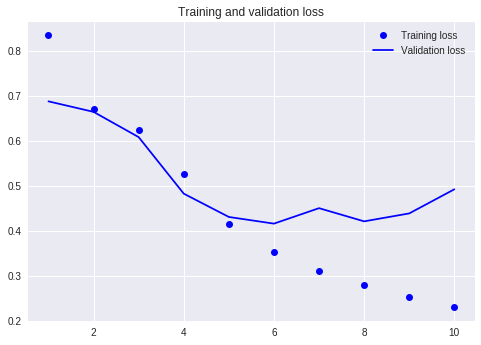

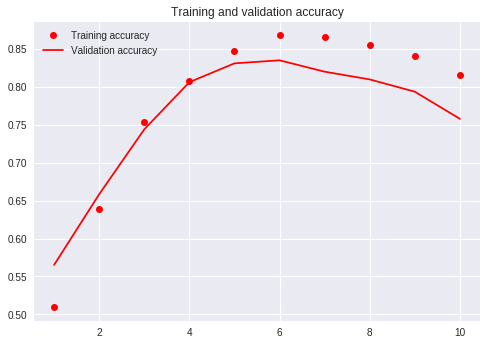

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()



accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

epochs = range(1, len(accuracy) + 1)
plt.figure()

plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()